# 📊 Análisis de Defunciones en Argentina (1880 - 2024)

Este trabajo presenta la exploración y visualización del dataset de defunciones en Argentina. 
Se analizaron variables como el año, género y edad de las personas fallecidas para comprender mejor la evolución y distribución de estos datos.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [3]:
df = pd.read_csv("dataset_defunciones.csv")
df['FECHA_DEFUNCION'] = pd.to_datetime(df['FECHA_DEFUNCION'], format="%d%b%Y:%H:%M:%S", errors='coerce')
df.head()

,FECHA_DEFUNCION,GENERO,DESCRIPCION_SUBTIPO
0,2012-07-25,Masculino,Defunción Digital
1,2012-07-31,Femenino,Defunción Digital
2,2012-08-07,Femenino,Defunción Digital
3,2012-12-29,Femenino,Defunción Digital
4,2012-12-30,Femenino,Defunción Digital


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994080 entries, 0 to 2994079
Data columns (total 3 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FECHA_DEFUNCION      datetime64[ns]
 1   GENERO               object        
 2   DESCRIPCION_SUBTIPO  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 68.5+ MB
None


In [5]:
df.isnull().sum()

FECHA_DEFUNCION         120
GENERO                 2658
DESCRIPCION_SUBTIPO       0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()
df.head()

,FECHA_DEFUNCION,GENERO,DESCRIPCION_SUBTIPO
0,2012-07-25,Masculino,Defunción Digital
1,2012-07-31,Femenino,Defunción Digital
2,2012-08-07,Femenino,Defunción Digital
3,2012-12-29,Femenino,Defunción Digital
4,2012-12-30,Femenino,Defunción Digital


In [7]:
df.isnull().sum()

FECHA_DEFUNCION        0
GENERO                 0
DESCRIPCION_SUBTIPO    0
dtype: int64

In [8]:
df['AÑO'] = df['FECHA_DEFUNCION'].dt.year

df = df[(df['AÑO'] >= 1880) & (df['AÑO'] <= 2024)]

In [9]:
df['GENERO'].value_counts()


GENERO
Masculino     1555042
Femenino      1411627
No declara      20489
Indefinido       3844
Name: count, dtype: int64

In [10]:
#Style
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Serif'

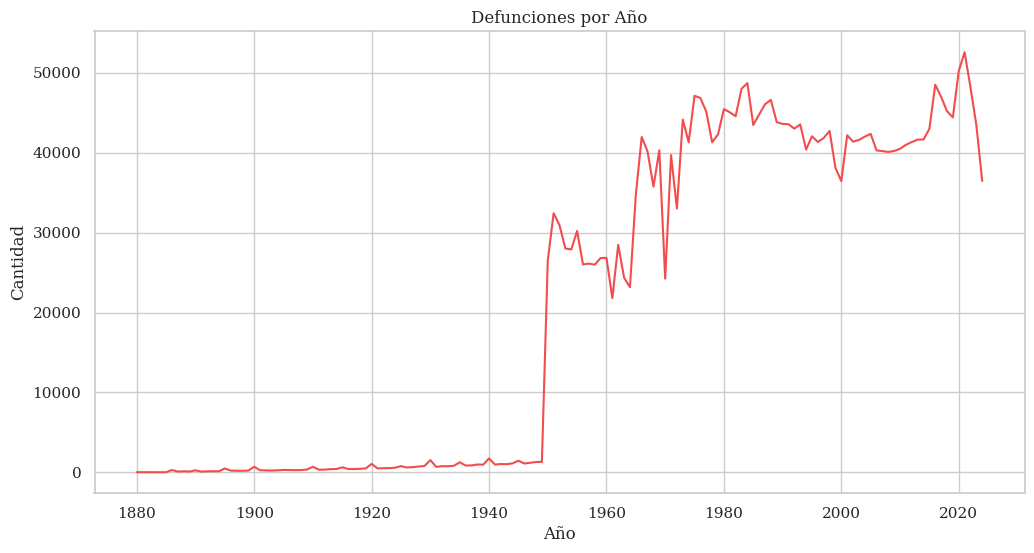

In [19]:
defunciones_por_año = df['AÑO'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=defunciones_por_año.index, y=defunciones_por_año.values,color='#F24C4C')
plt.title('Defunciones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.savefig('defunciones_año.png')
plt.show()

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_21028\384053152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genero_count.index,y=genero_count.values, palette=['#3A7CA5', '#F24C4C', '#F2C94C', '#A3F29C'])


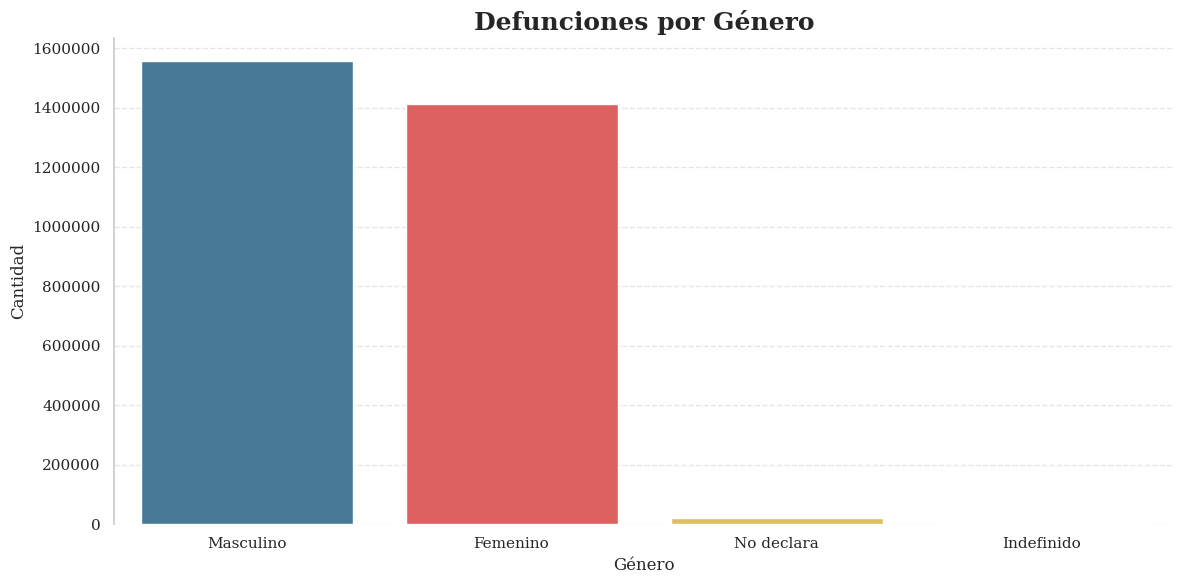

In [17]:
genero_count = df['GENERO'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genero_count.index,y=genero_count.values, palette=['#3A7CA5', '#F24C4C', '#F2C94C', '#A3F29C'])
plt.title('Defunciones por Género', fontsize=18, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
genero_count = genero_count.round(-2)
ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine(bottom=True)
plt.tight_layout()
plt.savefig('defunciones_genero.png')
plt.show()



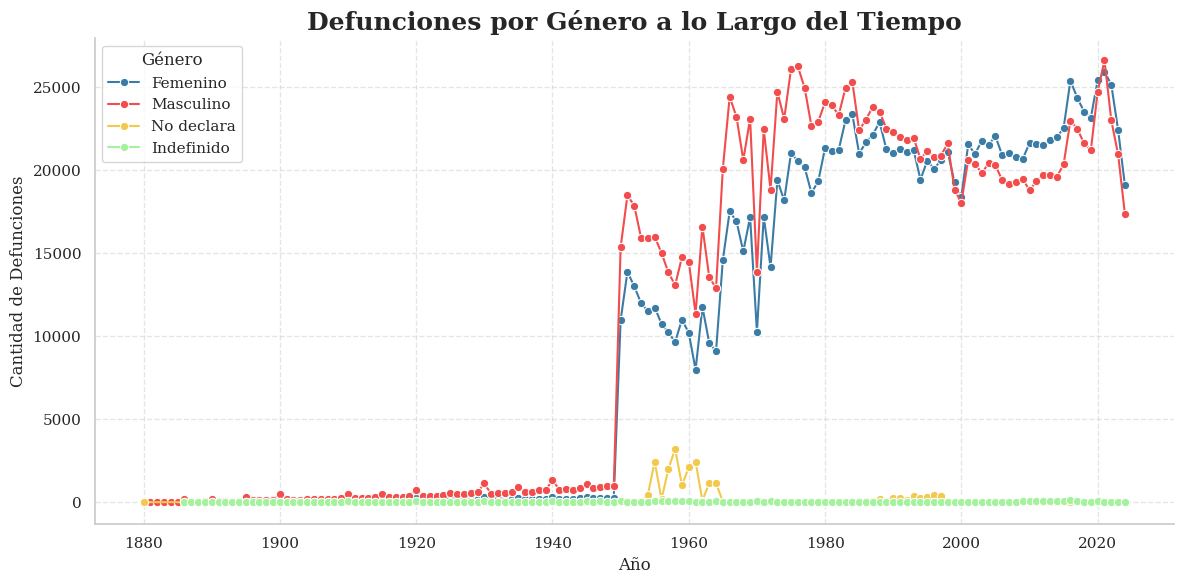

In [18]:

evolucion = df.groupby(['AÑO', 'GENERO']).size().reset_index(name='CANTIDAD')

plt.figure(figsize=(12, 6))
sns.lineplot(data=evolucion,x='AÑO',y='CANTIDAD',hue='GENERO',marker='o',palette=['#3A7CA5', '#F24C4C', '#F2C94C', '#A3F29C',])
plt.title('Defunciones por Género a lo Largo del Tiempo', fontsize=18, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Defunciones', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Género')
sns.despine()
plt.tight_layout()
plt.savefig('defunciones_genero_tiempo.png')
plt.show()



In [ ]:
# Guardá cada gráfico que hiciste
fig1.savefig("defunciones_por_año.png")
fig2.savefig("defunciones_por_edad.png")
fig3.savefig("defunciones_por_genero.png")


NameError: name 'fig1' is not defined

In [14]:
df.to_csv("dataset_limpio.csv", index=False)